# Unsupervised Learning: More Density Clustering

In [165]:
import numpy as np 
import pandas as pd
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.datasets import make_circles
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns
import matplotlib.pyplot as plt

Learning objectives:
- Practice implementing density clustering
- Practice visualizing and evaluating performance
- Understand the subtle differences between different density clustering algorithms

Notes:
- Use `sklearn.datasets` as needed
- Put all import statements at the top of this notebook
- Use `sns.scatterplot` to plot the clusters (e.g. `hue=color_var`)

## Datasets

We'll work with two synthetic datasets to explore how density clustering handles different density scenarios:

1. **Dataset 1**: Noisy concentric circles with **even density** (uniformly distributed points)
2. **Dataset 2**: Clusters with **very uneven density** (dense, medium, and sparse clusters)

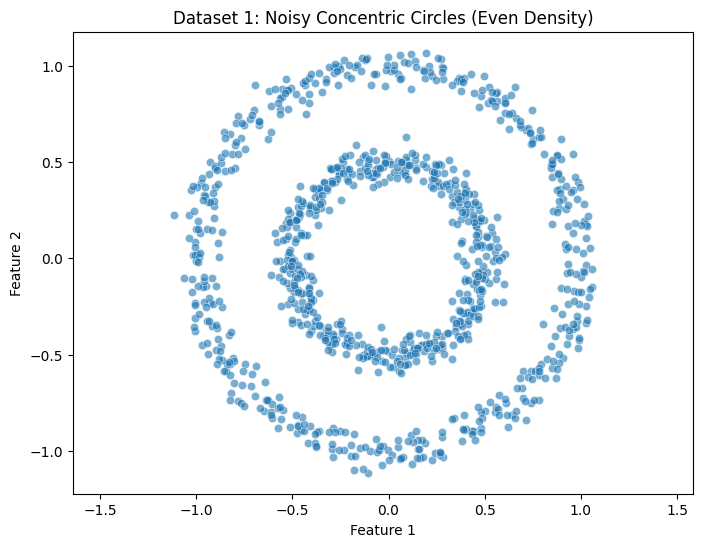

Dataset shape: (1000, 2)
Notice: Both circles have the same point density


In [166]:
# Dataset 1: Noisy concentric circles with even density
np.random.seed(42)
X_circles, y_circles = make_circles(n_samples=1000, factor=0.5, noise=0.05)

# Visualize the dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_circles[:, 0], y=X_circles[:, 1], alpha=0.6)
plt.title('Dataset 1: Noisy Concentric Circles (Even Density)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.show()

print(f"Dataset shape: {X_circles.shape}")
print(f"Notice: Both circles have the same point density")

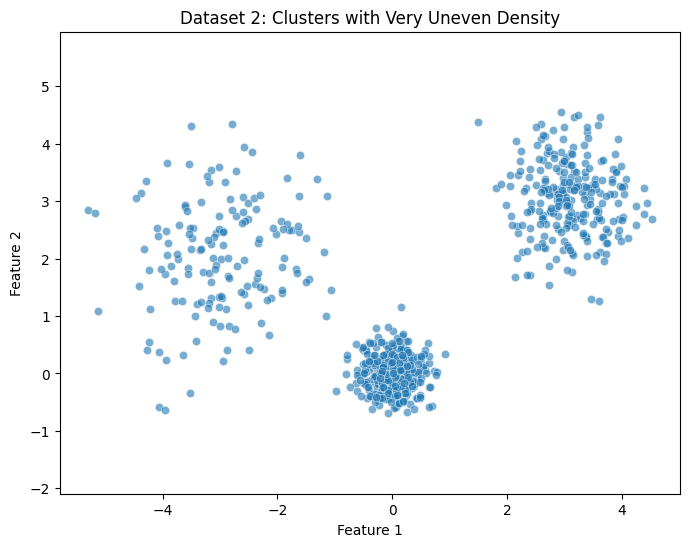

Dense cluster: 400 points, std=0.3
Medium cluster: 250 points, std=0.6
Sparse cluster: 150 points, std=0.9
Notice: Very different densities within the same dataset!


In [167]:
# Dataset 2: Clusters with very uneven density
# Create multiple blobs with very different standard deviations to simulate extreme varying densities
np.random.seed(42)

# Very dense cluster (very small std, many points)
X_dense = np.random.randn(400, 2) * 0.3 + np.array([0, 0])

# Medium density cluster
X_medium = np.random.randn(250, 2) * 0.6 + np.array([3, 3])

# Very sparse cluster (large std, fewer points)
X_sparse = np.random.randn(150, 2) * 0.9 + np.array([-3, 2])

# Combine all clusters
X_uneven = np.vstack([X_dense, X_medium, X_sparse])

# Visualize the dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_uneven[:, 0], y=X_uneven[:, 1], alpha=0.6)
plt.title('Dataset 2: Clusters with Very Uneven Density')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.show()

print(f"Dense cluster: 400 points, std=0.3")
print(f"Medium cluster: 250 points, std=0.6")
print(f"Sparse cluster: 150 points, std=0.9")
print(f"Notice: Very different densities within the same dataset!")

----

## Part 1: DBSCAN Clustering

**Quick Parameter Guide:**
- `eps`: Maximum distance between two points to be considered neighbors
  - Too small → Everything becomes noise
  - Too large → Everything merges into one cluster
  - **Hint**: For Dataset 1 (circles), try values around 0.15-0.20
  - **Hint**: For Dataset 2 (uneven), you'll need to experiment more!
- `min_samples`: Minimum number of points to form a dense region
  - **Hint**: Start with 5

### Q: Use `sklearn`'s `DBSCAN` to cluster both datasets

Try different `eps` values to see what works best!

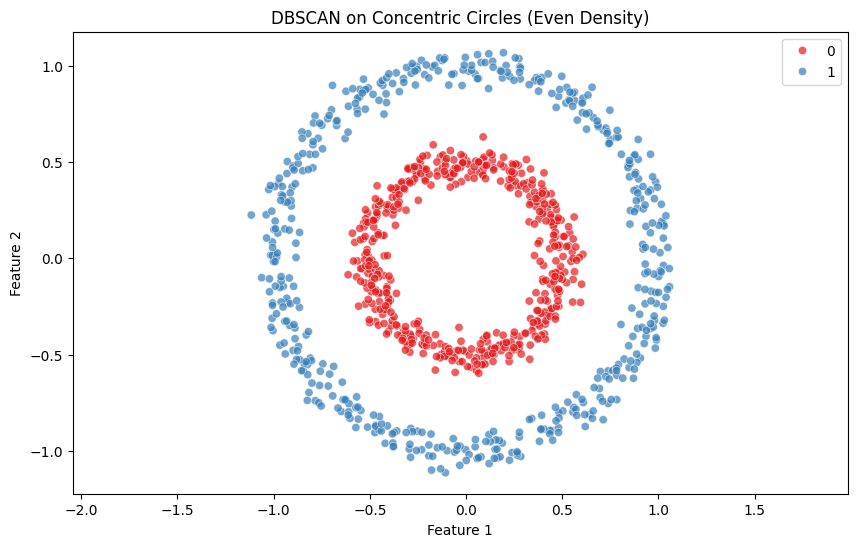

Number of clusters: 2
Number of noise points: 0


In [168]:
# DBSCAN on Dataset 1: Noisy Concentric Circles (Even Density)
# YOUR CODE HERE
dbscan_circles = DBSCAN(eps= 0.15, min_samples= 5)
labels_dbscan_circles = dbscan_circles.fit_predict(X_circles)

# Visualize clustering results
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_circles[:,0], y=X_circles[:,1], hue=labels_dbscan_circles, palette='Set1', alpha=0.7, legend='full')
plt.title('DBSCAN on Concentric Circles (Even Density)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.show()

# Print clustering statistics
# YOUR CODE HERE
n_clusters_circles = len(set(labels_dbscan_circles)) - (1 if -1 in labels_dbscan_circles else 0)
n_noise_circles = list(labels_dbscan_circles).count(-1)
print(f"Number of clusters: {n_clusters_circles}")
print(f"Number of noise points: {n_noise_circles}")

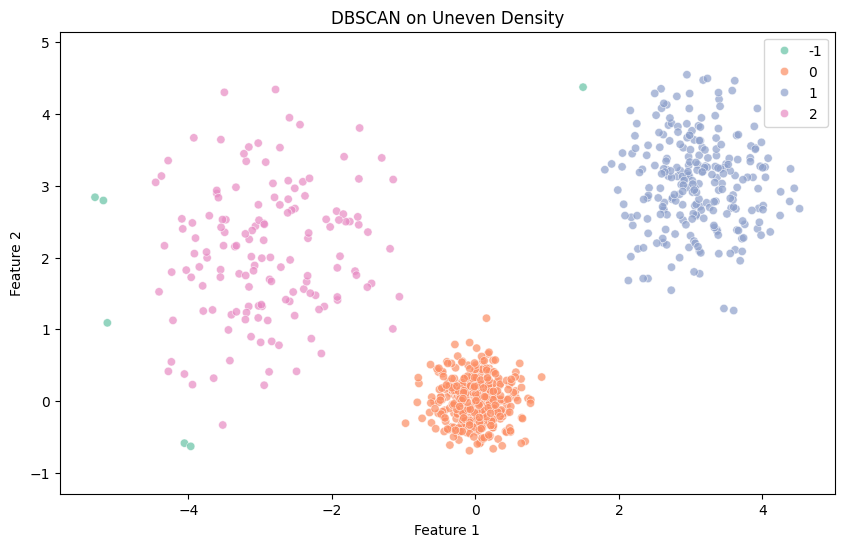

Number of clusters: 3
Number of noise points: 6


In [169]:
# DBSCAN on Dataset 2: Uneven Density Clusters
# YOUR CODE HERE
dbscan_uneven = DBSCAN(eps= 0.7, min_samples=5)
labels_dbscan_uneven = dbscan_uneven.fit_predict(X_uneven)

# Visualize clustering results
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_uneven[:,0], y= X_uneven[:,1], hue=labels_dbscan_uneven, palette='Set2', alpha=0.7, legend='full')
plt.title('DBSCAN on Uneven Density')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.show()

# Print clustering statistics
# YOUR CODE HERE
n_clusters_uneven = len(set(labels_dbscan_uneven)) - (1 if -1 in labels_dbscan_uneven else 0)
n_noise_uneven = list(labels_dbscan_uneven).count(-1)
print(f"Number of clusters: {n_clusters_uneven}")
print(f"Number of noise points: {n_noise_uneven}")

### Q: Compute quantitative evaluation metrics for DBSCAN

Use the clustering metrics we imported (`silhouette_score`, `davies_bouldin_score`, `calinski_harabasz_score`) to evaluate DBSCAN's performance on both datasets.

**Important:** Exclude noise points (label = -1) when computing these metrics.

In [170]:
# Evaluate DBSCAN on Dataset 1 (Even Density Circles)
# YOUR CODE HERE
# Filter out noise points first
mask_circles = labels_dbscan_circles != -1

if mask_circles.sum() > 0 and len(set(labels_dbscan_circles[mask_circles])) > 1:
    silhouette_dbscan_circles = silhouette_score(X_circles[mask_circles],labels_dbscan_circles[mask_circles])
    davies_bouldin_dbscan_circles = davies_bouldin_score(X_circles[mask_circles],labels_dbscan_circles[mask_circles])
    calinski_dbscan_circles = calinski_harabasz_score(X_circles[mask_circles],labels_dbscan_circles[mask_circles])
    
    print("DBSCAN Performance on Dataset 1 (Even Density Circles):")
    print(f"  Silhouette Score: {silhouette_dbscan_circles:.4f} (higher is better, range: -1 to 1)")
    print(f"  Davies-Bouldin Index: {davies_bouldin_dbscan_circles:.4f} (lower is better)")
    print(f"  Calinski-Harabasz Index: {calinski_dbscan_circles:.4f} (higher is better)")

# Evaluate DBSCAN on Dataset 2 (Uneven Density)
# YOUR CODE HERE
mask_uneven = labels_dbscan_uneven != -1

if mask_uneven.sum() > 0 and len(set(labels_dbscan_uneven[mask_uneven])) > 1:
    silhouette_dbscan_uneven = silhouette_score(X_uneven[mask_uneven],labels_dbscan_uneven[mask_uneven])
    davies_bouldin_dbscan_uneven = davies_bouldin_score(X_uneven[mask_uneven],labels_dbscan_uneven[mask_uneven])
    calinski_dbscan_uneven = calinski_harabasz_score(X_uneven[mask_uneven],labels_dbscan_uneven[mask_uneven])
    
    print("\nDBSCAN Performance on Dataset 2 (Uneven Density):")
    print(f"  Silhouette Score: {silhouette_dbscan_uneven:.4f}")
    print(f"  Davies-Bouldin Index: {davies_bouldin_dbscan_uneven:.4f}")
    print(f"  Calinski-Harabasz Index: {calinski_dbscan_uneven:.4f}")

DBSCAN Performance on Dataset 1 (Even Density Circles):
  Silhouette Score: 0.1125 (higher is better, range: -1 to 1)
  Davies-Bouldin Index: 894.1294 (lower is better)
  Calinski-Harabasz Index: 0.0011 (higher is better)

DBSCAN Performance on Dataset 2 (Uneven Density):
  Silhouette Score: 0.7705
  Davies-Bouldin Index: 0.3763
  Calinski-Harabasz Index: 4292.3433


### Q: Based on the metrics above, how did DBSCAN perform on each dataset? 

Compare Dataset 1 (even density) vs Dataset 2 (uneven density). Which was easier for DBSCAN to cluster? Did you need to use different `eps` values for the two datasets?

### A:
DBSCAN performed much better on dataset 2, based on the metrics above. The first dataset was easier for DBSCAN to cluster, and I had to use different eps values for the two datasets. 

----

## Part 2: OPTICS Clustering

**OPTICS** (Ordering Points To Identify the Clustering Structure) is similar to DBSCAN but can handle clusters with varying densities better. Unlike DBSCAN which requires a fixed `eps` parameter, OPTICS creates a reachability plot that can identify clusters at different density levels.

**Key differences from DBSCAN:**
- Can find clusters of varying densities
- Uses `max_eps` instead of fixed `eps`
- More computationally expensive

**Resources:**
- [Wikipedia article](https://en.wikipedia.org/wiki/OPTICS_algorithm)
- [sklearn docs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html)

**Quick Parameter Guide:**
- `min_samples`: Same meaning as in DBSCAN (try 5)
- `xi`: Steepness threshold for cluster extraction (try 0.05)
  - Controls how OPTICS extracts clusters from the reachability plot
  - Lower values → more clusters, higher values → fewer clusters
- `min_cluster_size`: Minimum fraction of samples in a cluster (try 0.05)
  - Helps avoid tiny clusters

**Hint**: Using `xi` and `min_cluster_size` gives better results than just `max_eps`!

### Q: Use `sklearn`'s `OPTICS` to cluster both datasets

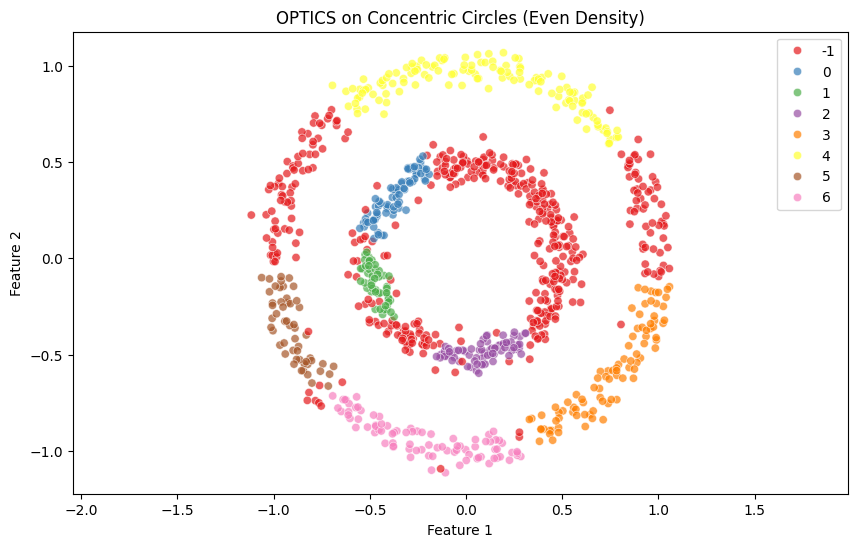

Number of clusters: 7
Number of noise points: 448


In [171]:
# OPTICS on Dataset 1: Noisy Concentric Circles (Even Density)
# YOUR CODE HERE
optics_circles = OPTICS(min_samples= 5, xi=0.05, min_cluster_size=0.05)
labels_optics_circles = optics_circles.fit_predict(X_circles)

# Visualize clustering results
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_circles[:,0], y=X_circles[:,1], hue=labels_optics_circles, palette='Set1', alpha=0.7, legend='full')
plt.title('OPTICS on Concentric Circles (Even Density)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.show()

# Print clustering statistics
# YOUR CODE HERE
n_clusters_optics_circles = len(set(labels_optics_circles)) - (1 if -1 in labels_optics_circles else 0)
n_noise_optics_circles = list(labels_optics_circles).count(-1)
print(f"Number of clusters: {n_clusters_optics_circles}")
print(f"Number of noise points: {n_noise_optics_circles}")

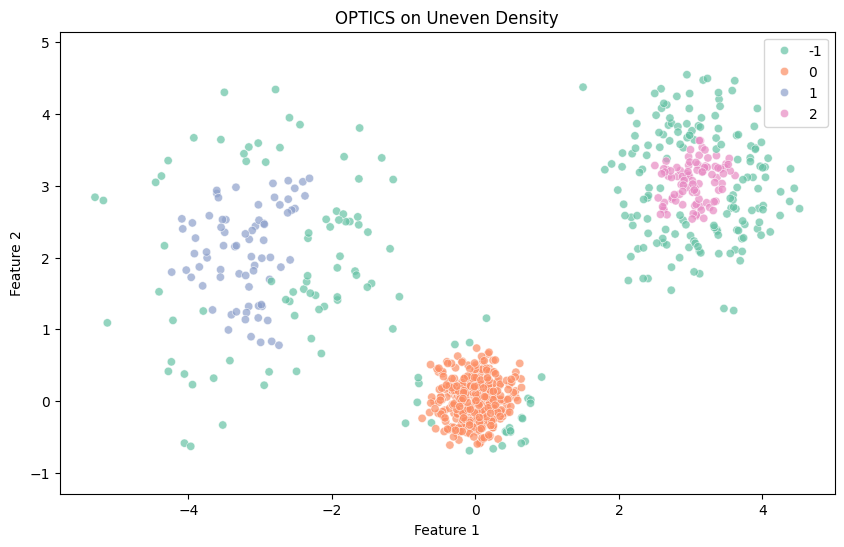

Number of clusters: 3
Number of noise points: 257


In [172]:
# OPTICS on Dataset 2: Uneven Density Clusters
# YOUR CODE HERE
optics_uneven = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
labels_optics_uneven = optics_uneven.fit_predict(X_uneven)

# Visualize clustering results
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_uneven[:,0], y=X_uneven[:,1], hue=labels_optics_uneven, palette='Set2', alpha=0.7, legend='full')
plt.title('OPTICS on Uneven Density')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.show()

# Print clustering statistics
# YOUR CODE HERE
n_clusters_optics_uneven = len(set(labels_optics_uneven)) - (1 if -1 in labels_optics_uneven else 0)
n_noise_optics_uneven = list(labels_optics_uneven).count(-1)
print(f"Number of clusters: {n_clusters_optics_uneven}")
print(f"Number of noise points: {n_noise_optics_uneven}")

### Q: Compute quantitative evaluation metrics for OPTICS

Use the same metrics to evaluate OPTICS's performance on both datasets.

In [173]:
# Evaluate OPTICS on Dataset 1 (Even Density Circles)
# YOUR CODE HERE
mask_optics_circles = labels_optics_circles != -1

if mask_optics_circles.sum() > 0 and len(set(labels_optics_circles[mask_optics_circles])) > 1:
    silhouette_optics_circles = silhouette_score(X_circles[mask_optics_circles],labels_dbscan_circles[mask_optics_circles])
    davies_bouldin_optics_circles = davies_bouldin_score(X_circles[mask_optics_circles],labels_dbscan_circles[mask_optics_circles])
    calinski_optics_circles = calinski_harabasz_score(X_circles[mask_optics_circles],labels_dbscan_circles[mask_optics_circles])
    
    print("OPTICS Performance on Dataset 1 (Even Density Circles):")
    print(f"  Silhouette Score: {silhouette_optics_circles:.4f}")
    print(f"  Davies-Bouldin Index: {davies_bouldin_optics_circles:.4f}")
    print(f"  Calinski-Harabasz Index: {calinski_optics_circles:.4f}")

# Evaluate OPTICS on Dataset 2 (Uneven Density)
# YOUR CODE HERE
mask_optics_uneven = labels_optics_uneven != -1

if mask_optics_uneven.sum() > 0 and len(set(labels_optics_uneven[mask_optics_uneven])) > 1:
    silhouette_optics_uneven = silhouette_score(X_uneven[mask_optics_uneven],labels_optics_uneven[mask_optics_uneven])
    davies_bouldin_optics_uneven = davies_bouldin_score(X_uneven[mask_optics_uneven],labels_optics_uneven[mask_optics_uneven])
    calinski_optics_uneven = calinski_harabasz_score(X_uneven[mask_optics_uneven],labels_optics_uneven[mask_optics_uneven])
    
    print("\nOPTICS Performance on Dataset 2 (Uneven Density):")
    print(f"  Silhouette Score: {silhouette_optics_uneven:.4f}")
    print(f"  Davies-Bouldin Index: {davies_bouldin_optics_uneven:.4f}")
    print(f"  Calinski-Harabasz Index: {calinski_optics_uneven:.4f}")

OPTICS Performance on Dataset 1 (Even Density Circles):
  Silhouette Score: 0.0759
  Davies-Bouldin Index: 5.4061
  Calinski-Harabasz Index: 12.1237

OPTICS Performance on Dataset 2 (Uneven Density):
  Silhouette Score: 0.8572
  Davies-Bouldin Index: 0.2419
  Calinski-Harabasz Index: 5825.1157


----

## Part 3: Comparing DBSCAN vs. OPTICS

Now let's compare the two algorithms side-by-side to understand their strengths and weaknesses.

### Q: Create a comparison table of performance metrics

Use a pandas DataFrame to compare the performance metrics for all four combinations:
- DBSCAN on Circles vs OPTICS on Circles
- DBSCAN on Uneven Density vs OPTICS on Uneven Density

In [174]:
# Create comparison DataFrame
# YOUR CODE HERE
comparison_data = [
    {
        'Dataset': 'Even Density (Circles)',
        'Algorithm': 'DBSCAN',
        'Clusters': n_clusters_circles,
        'Noise Points': n_noise_circles,
        'Silhouette': silhouette_dbscan_circles,
        'Davies-Bouldin': davies_bouldin_dbscan_circles,
        'Calinski-Harabasz': calinski_dbscan_circles
    },
    {
        'Dataset': 'Even Density (Circles)',
        'Algorithm': 'OPTICS',
        'Clusters': n_clusters_uneven,
        'Noise Points': n_noise_circles,
        'Silhouette': silhouette_dbscan_uneven,
        'Davies-Bouldin': davies_bouldin_dbscan_uneven,
        'Calinski-Harabasz': calinski_dbscan_uneven   
    },
#     # Add two more dictionaries for the Uneven Density dataset
#     # YOUR CODE HERE
]
# 
df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))
print("\nReminder: Silhouette & Calinski-Harabasz → higher is better | Davies-Bouldin → lower is better")

               Dataset Algorithm  Clusters  Noise Points  Silhouette  Davies-Bouldin  Calinski-Harabasz
Even Density (Circles)    DBSCAN         2             0    0.112462      894.129425           0.001122
Even Density (Circles)    OPTICS         3             0    0.770542        0.376308        4292.343300

Reminder: Silhouette & Calinski-Harabasz → higher is better | Davies-Bouldin → lower is better


### Q: Create side-by-side visualizations comparing the clustering results

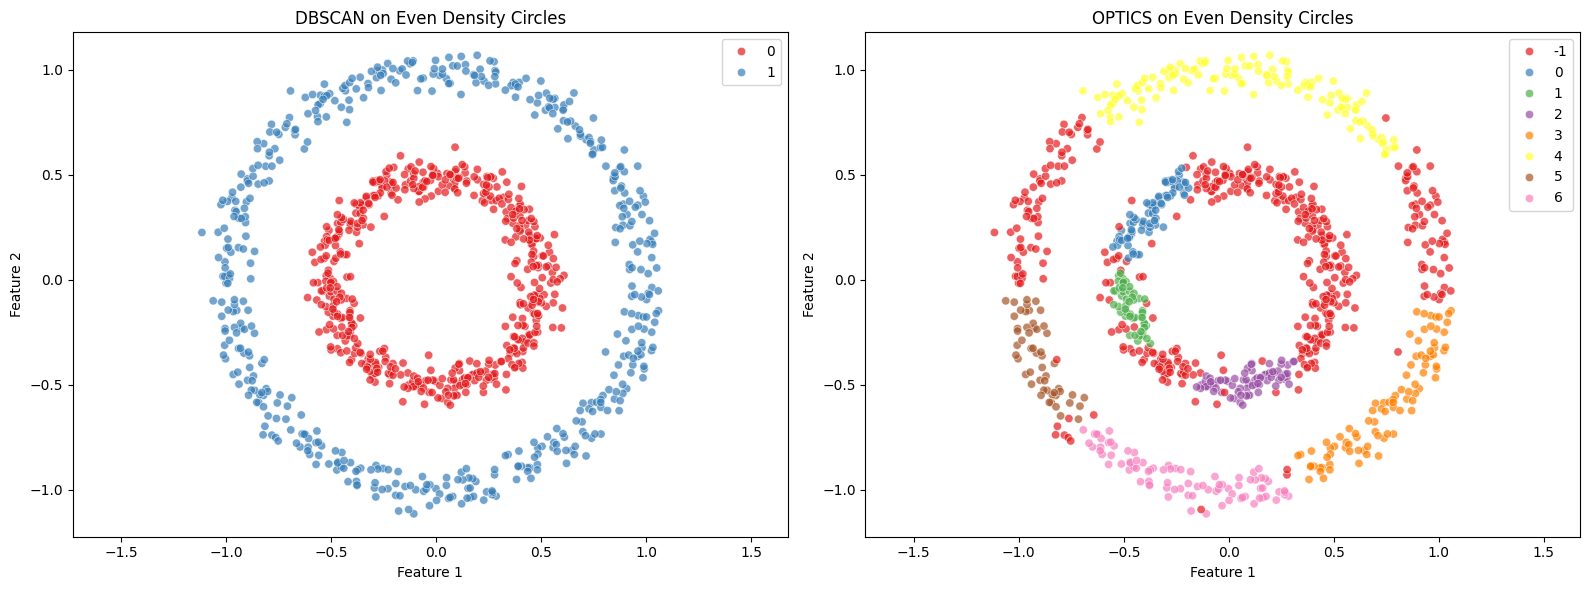

In [175]:
# Side-by-side comparison: Dataset 1 (Even Density Circles)
# YOUR CODE HERE (Uncomment and fill in the blanks)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# DBSCAN
sns.scatterplot(x=X_circles[:,0], y=X_circles[:,1], hue=labels_dbscan_circles, palette='Set1', alpha=0.7, legend='full', ax=axes[0])
axes[0].set_title(f'DBSCAN on Even Density Circles')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].axis('equal')

# OPTICS
sns.scatterplot(x=X_circles[:,0], y=X_circles[:,1], hue=labels_optics_circles, palette='Set1', alpha=0.7, legend='full', ax=axes[1])
axes[1].set_title(f'OPTICS on Even Density Circles')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

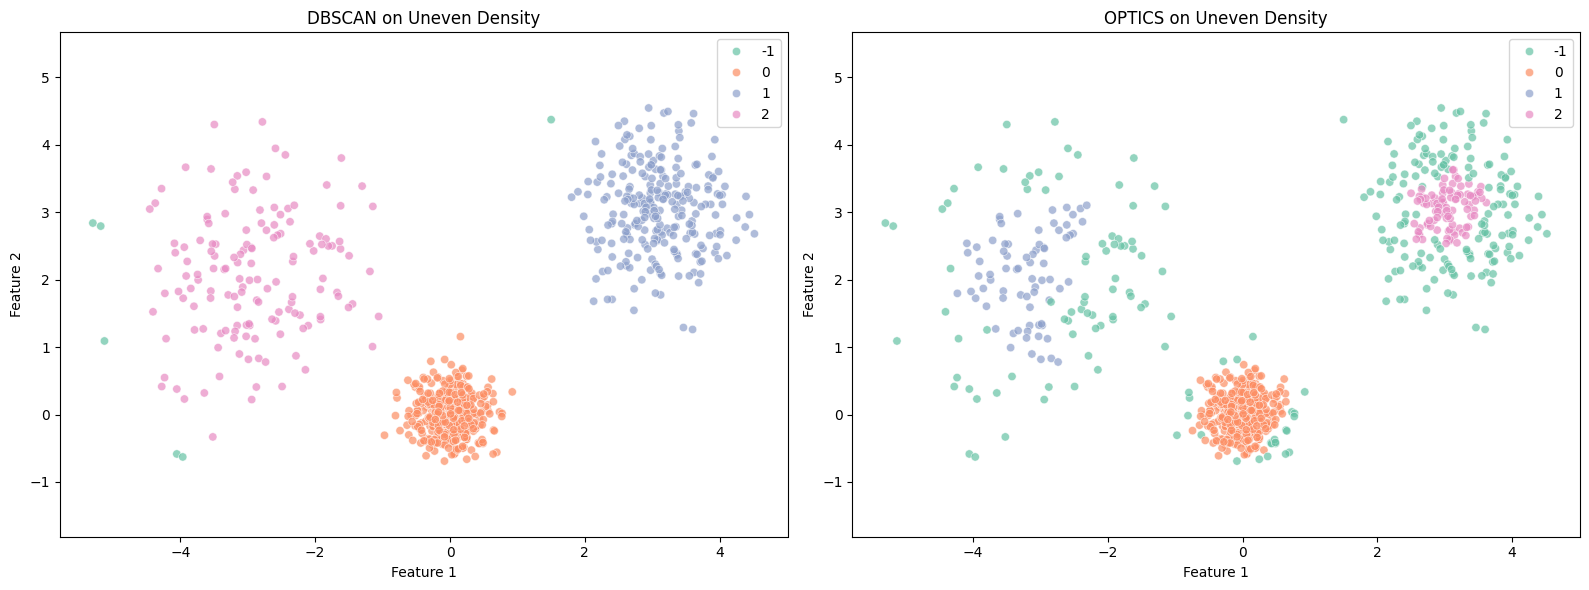

In [176]:
# Side-by-side comparison: Dataset 2 (Uneven Density)
# YOUR CODE HERE (Uncomment and fill in the blanks)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# DBSCAN
sns.scatterplot(x=X_uneven[:,0], y=X_uneven[:,1], hue=labels_dbscan_uneven, palette='Set2', alpha=0.7, legend='full', ax=axes[0])
axes[0].set_title(f'DBSCAN on Uneven Density')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].axis('equal')

# OPTICS
sns.scatterplot(x=X_uneven[:,0], y=X_uneven[:,1], hue=labels_optics_uneven, palette='Set2', alpha=0.7, legend='full', ax=axes[1])
axes[1].set_title(f'OPTICS on Uneven Density')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

----

## Reflection Questions

1. **DBSCAN on Even vs Uneven Density**: Compare DBSCAN's performance on Dataset 1 (even density circles) vs Dataset 2 (very uneven density). On which dataset did DBSCAN perform better? Why?

2. **The Key Challenge**: On Dataset 2, did you struggle to find a single `eps` value that worked well for all three clusters? What happened when you used:
   - A small `eps` (good for the dense cluster)?
   - A large `eps` (good for the sparse cluster)?

3. **OPTICS to the Rescue**: How did OPTICS handle Dataset 2 compared to DBSCAN? Did it successfully identify all three clusters without you having to manually tune `eps` for each density level?

4. **When is DBSCAN Sufficient?**: Based on your results, when would you use DBSCAN instead of OPTICS? (Hint: Think about Dataset 1's results and computational cost)

5. **Trade-offs**: OPTICS is more computationally expensive than DBSCAN. Given what you observed:
   - When is the extra cost worth it?
   - When can you get away with using simpler, faster DBSCAN?

6. **Real-World Application**: Imagine clustering customer locations in a city where:
   - Downtown has very dense clusters (many customers in small area)
   - Suburbs have sparse clusters (few customers spread out)
   
   Which algorithm would you choose and why? What problems might you encounter with each?

### A:
1. DBSCAN performed better on dataset 1 because it split the data more clearly.
2. When the eps was too small it split the less dense clusters into small pieces and when the eps was too large it merged the clusters into one big cluster.
3. On dataset 2, optics performed better than DBSCAN because it didn't have a specific eps value used that we had to manually tune  like DBSCAN. 
4. DBSCAN is useful when the clusters are similarly dense. 
5. Even though optics is more expensive, it is worth it when the densities of clusters are different. DBSCAN can be use when the densities are similar and faster speed is needed over performance with clusters with multiple densities. 
6. I would choose optics because it can handle clusters with varying densities (dense downtown and scattered suburbs). DBSCAN might cluster dense and sparse areas together, but optics might take a long time to compute everything. 